In [149]:
import numpy as np
import pandas as pd 
import os
import random
from tqdm import tqdm
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from scipy.stats import mannwhitneyu

init_notebook_mode(connected=True) ## plotly init
seed = 123
random.seed = seed

In [150]:
EEG_data = pd.DataFrame({}) ## create an empty df that will hold data from each file


temp_df = pd.read_csv('/home/biswadeep/Desktop/EEG-data-analysis-master/data_sample/alc.csv') ## read from the file to df
EEG_data = EEG_data.append(temp_df) ## add the file data to the main df
    
EEG_data = EEG_data.drop(['Unnamed: 0'], axis=1) ## remove the unused column
#EEG_data.loc[EEG_data['matching condition'] == 'S2 nomatch,', 'matching condition'] =  'S2 nomatch' ## remove comma sign from stimulus name

In [72]:
EEG_data

,X1,subject,group,condition,trial,channel,time,voltage
0,1.0,co2a0000364,a,S2n,7,FP1,0,2.400427
1,2.0,co2a0000364,a,S2n,7,FP1,1,2.581384
2,3.0,co2a0000364,a,S2n,7,FP1,2,0.206997
3,4.0,co2a0000364,a,S2n,7,FP1,3,-2.462065
4,5.0,co2a0000364,a,S2n,7,FP1,4,-2.856416
5,6.0,co2a0000364,a,S2n,7,FP1,5,-0.738159
6,7.0,co2a0000364,a,S2n,7,FP1,6,1.791475
7,8.0,co2a0000364,a,S2n,7,FP1,7,2.606643
8,9.0,co2a0000364,a,S2n,7,FP1,8,1.418523
9,10.0,co2a0000364,a,S2n,7,FP1,9,-0.522383


In [18]:
## replace some 'sensor position' values
EEG_data.loc[EEG_data['sensor position'] == 'AF1', 'sensor position'] = 'AF3'
EEG_data.loc[EEG_data['sensor position'] == 'AF2', 'sensor position'] = 'AF4'
EEG_data.loc[EEG_data['sensor position'] == 'PO1', 'sensor position'] = 'PO3'
EEG_data.loc[EEG_data['sensor position'] == 'PO2', 'sensor position'] = 'PO4'
## remove rows with undefined positions
EEG_data = EEG_data[(EEG_data['sensor position'] != 'X') & (EEG_data['sensor position'] != 'Y') & (EEG_data['sensor position'] != 'nd')]

In [151]:
def sample_data(stimulus, random_id=random.randint(0,7)):
    """Function merged data frame - one data frame for randomly selected subject from control group and 
    one data frame for randomly selected subject from alcoholic group"""
    ## random choose the name_id of subject from alcoholic/control group
    alcoholic_id = EEG_data['name'][(EEG_data['subject identifier'] == 'a') & 
                                    (EEG_data['matching condition'] == stimulus)].unique()[random_id]
    control_id = EEG_data['name'][(EEG_data['subject identifier'] == 'c') & 
                                  (EEG_data['matching condition'] == stimulus)].unique()[random_id]
    
    ## get min trial numbers for each group
    alcoholic_trial_number = EEG_data['trial number'][(EEG_data['name'] == alcoholic_id) & (EEG_data['matching condition'] == stimulus)].min()
    control_trial_number = EEG_data['trial number'][(EEG_data['name'] == control_id) & (EEG_data['matching condition'] == stimulus)].min()

    ## filter the EEG DF
    alcoholic_df = EEG_data[(EEG_data['name'] == alcoholic_id) & (EEG_data['trial number'] == alcoholic_trial_number)]
    control_df = EEG_data[(EEG_data['name'] == control_id) & (EEG_data['trial number'] == control_trial_number)]
    
    return alcoholic_df.append(control_df)

In [ ]:
sensor_positions = EEG_data[['sensor position', 'channel']].drop_duplicates().reset_index(drop=True).drop(['channel'], axis=1).reset_index(drop=False).rename(columns={'index':'channel'})['sensor position']
channels = EEG_data[['sensor position', 'channel']].drop_duplicates().reset_index(drop=True).drop(['channel'], axis=1).reset_index(drop=False).rename(columns={'index':'channel'})['channel']

def plot_3dSurface_and_heatmap(stimulus, group, df):
    
    if group == 'c':
        group_name = 'Control'
    else:
        group_name = 'Alcoholic'
        
    temp_df = pd.pivot_table(df[['channel', 'sample num', 'sensor value']][(df['subject identifier'] == group) & (df['matching condition'] == stimulus)],
                                          index='channel', columns='sample num', values='sensor value').values.tolist()
    data = [go.Surface(z=temp_df, colorscale='Bluered')]

    layout = go.Layout(
        title='<br>3d Surface and Heatmap of Sensor Values for ' + stimulus + ' Stimulus for ' + group_name + ' Group',
        width=800,
        height=900,
        autosize=False,
        margin=dict(t=0, b=0, l=0, r=0),
        scene=dict(
            xaxis=dict(
                title='Time (sample num)',
                gridcolor='rgb(255, 255, 255)',
    #             erolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            yaxis=dict(
                title='Channel',
                tickvals=channels,
                ticktext=sensor_positions,
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230, 230)'
            ),
            zaxis=dict(
                title='Sensor Value',
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            aspectratio = dict(x=1, y=1, z=0.5),
            aspectmode = 'manual'
        )
    )

    updatemenus=list([
        dict(
            buttons=list([   
                dict(
                    args=['type', 'surface'],
                    label='3D Surface',
                    method='restyle'
                ),
                dict(
                    args=['type', 'heatmap'],
                    label='Heatmap',
                    method='restyle'
                )             
            ]),
            direction = 'left',
            pad = {'r': 10, 't': 10},
            showactive = True,
            type = 'buttons',
            x = 0.1,
            xanchor = 'left',
            y = 1.1,
            yanchor = 'top' 
        ),
    ])

    annotations = list([
        dict(text='Trace type:', x=0, y=1.085, yref='paper', align='left', showarrow=False)
    ])
    layout['updatemenus'] = updatemenus
    layout['annotations'] = annotations

    fig = dict(data=data, layout=layout)
    iplot(fig)

In [32]:
stimulus = 'S2 nomatch'
S2_nm_sample_df = sample_data(stimulus=stimulus)

IndexError: index 6 is out of bounds for axis 0 with size 1

In [33]:
from scipy.signal import hilbert, chirp

In [34]:
def plot_sensors_correlation(df, threshold_value):
    """Funtion plots the the correlation plots between sensor positions for each group"""
    correlations_alcoholic = pd.pivot_table(df[df['subject identifier'] == 'a'], 
                                          values='sensor value', index='sample num', columns='sensor position').corr()

    correlations_control = pd.pivot_table(df[df['subject identifier'] == 'c'], 
                                          values='sensor value', index='sample num', columns='sensor position').corr()

    fig = plt.figure(figsize=(17,10))
    ax = fig.add_subplot(121)
    ax.set_title('Alcoholic group', fontsize=14)
    mask = np.zeros_like(correlations_alcoholic, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(correlations_alcoholic, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    ax = fig.add_subplot(122)
    ax.set_title('Control group', fontsize=14)
    mask = np.zeros_like(correlations_control, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(correlations_control, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.suptitle('Correlation between Sensor Positions for ' + df['matching condition'].unique()[0] + ' stimulus', fontsize=16)
    plt.show()
    
    get_correlated_pairs_sample(threshold=threshold_value, correlation_df=correlations_alcoholic, group='Alcoholic')
    print('\n')
    get_correlated_pairs_sample(threshold=threshold_value, correlation_df=correlations_control, group='Control')

In [35]:
def get_correlated_pairs_sample(threshold, correlation_df, group):
    ## create dictionary wheke keys are the pairs and values are the amount of high correlation pair
    corr_pairs_dict = {}
    for i in range(len(list_of_pairs)):
        temp_corr_pair = dict(zip(list_of_pairs[i], [0]))
        corr_pairs_dict.update(temp_corr_pair)

    j = 0
    for column in correlation_df.columns:
        j += 1
        for i in range(j, len(correlation_df)):
            if ((correlation_df[column][i] >= threshold) & (column != correlation_df.index[i])):
                corr_pairs_dict[column + '-' + correlation_df.index[i]] += 1

    corr_count = pd.DataFrame(corr_pairs_dict, index=['count']).T.reset_index(drop=False).rename(columns={'index': 'channel_pair'})
    print('Channel pairs that have correlation value >= ' + str(threshold) + ' (' + group + ' group):')
    print(corr_count['channel_pair'][corr_count['count'] > 0].tolist())

In [36]:
alcoholic_id = EEG_data['name'][(EEG_data['subject identifier'] == 'a') & 
                                    (EEG_data['matching condition'] == stimulus)].unique()

In [152]:
control_id = EEG_data['name'][(EEG_data['subject identifier'] == 'c') & 
                                  (EEG_data['matching condition'] == stimulus)].unique()[0]

KeyError: 'name'

In [40]:
alcoholic_id[0]

'co2a0000369'

In [47]:
alcoholic_trial_number = EEG_data['trial number'][(EEG_data['name'] == alcoholic_id) & (EEG_data['matching condition'] == stimulus)].min()

ValueError: Lengths must match to compare

In [46]:
pd.pivot_table(df[df['subject identifier'] == 'a'], 
                                          name='co2a0000369')

TypeError: pivot_table() got an unexpected keyword argument 'name'

In [44]:
S1_sample_df = sample_data(stimulus=stimulus, random_id=0)

In [45]:
df = S1_sample_df

In [167]:
EEG_data

,X1,subject,group,condition,trial,channel,time,voltage
0,1.0,co2a0000364,a,S2n,7,FP1,0,2.400427
1,2.0,co2a0000364,a,S2n,7,FP1,1,2.581384
2,3.0,co2a0000364,a,S2n,7,FP1,2,0.206997
3,4.0,co2a0000364,a,S2n,7,FP1,3,-2.462065
4,5.0,co2a0000364,a,S2n,7,FP1,4,-2.856416
5,6.0,co2a0000364,a,S2n,7,FP1,5,-0.738159
6,7.0,co2a0000364,a,S2n,7,FP1,6,1.791475
7,8.0,co2a0000364,a,S2n,7,FP1,7,2.606643
8,9.0,co2a0000364,a,S2n,7,FP1,8,1.418523
9,10.0,co2a0000364,a,S2n,7,FP1,9,-0.522383


In [175]:
random_id = 0
#alcoholic_id = EEG_data['name'][(EEG_data['subject identifier'] == 'a') & (EEG_data['matching condition'] == stimulus)].unique()[random_id]
alcoholic_trial_number = EEG_data['trial'][(EEG_data['subject'] == 'co2a0000364') &(EEG_data['condition'] == 'S2n')].min()
alcoholic_df = EEG_data[(EEG_data['subject'] == 'co2a0000364') & (EEG_data['channel'] == 'FP1')]
alcoholic_df

,X1,subject,group,condition,trial,channel,time,voltage
0,1.0,co2a0000364,a,S2n,7,FP1,0,2.400427
1,2.0,co2a0000364,a,S2n,7,FP1,1,2.581384
2,3.0,co2a0000364,a,S2n,7,FP1,2,0.206997
3,4.0,co2a0000364,a,S2n,7,FP1,3,-2.462065
4,5.0,co2a0000364,a,S2n,7,FP1,4,-2.856416
5,6.0,co2a0000364,a,S2n,7,FP1,5,-0.738159
6,7.0,co2a0000364,a,S2n,7,FP1,6,1.791475
7,8.0,co2a0000364,a,S2n,7,FP1,7,2.606643
8,9.0,co2a0000364,a,S2n,7,FP1,8,1.418523
9,10.0,co2a0000364,a,S2n,7,FP1,9,-0.522383


In [191]:
random_id = 0
control_id = EEG_data['subject'][(EEG_data['group'] == 'c')].unique()[random_id]
control_trial_number = EEG_data['trial'][(EEG_data['subject'] == control_id) ].min()
control_df = EEG_data[(EEG_data['subject'] == 'co2c0000337') & (EEG_data['channel'] == 'FP1')]
control_id

'co2c0000337'

In [184]:
alcoholic_df.iloc[0:,7]

0         2.400427
1         2.581384
2         0.206997
3        -2.462065
4        -2.856416
5        -0.738159
6         1.791475
7         2.606643
8         1.418523
9        -0.522383
10       -1.881923
11       -2.045645
12       -0.989043
13        0.842032
14        2.379206
15        2.317129
16        0.308850
17       -2.246645
18       -3.128670
19       -1.373254
20        1.622239
21        3.274981
22        2.184642
23       -0.638581
24       -2.790615
25       -2.615376
26       -0.466537
27        1.834152
28        2.588024
29        1.432160
            ...   
140770   -2.774402
140771   -4.115342
140772   -2.813499
140773    0.091759
140774    2.732141
140775    3.591827
140776    2.295383
140777   -0.273538
140778   -2.522319
140779   -3.127453
140780   -1.870149
140781    0.300013
140782    2.039459
140783    2.528642
140784    1.766439
140785    0.231332
140786   -1.460795
140787   -2.571477
140788   -2.335419
140789   -0.542170
140790    1.870937
140791    3.

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp

duration = 1.0
fs = 400.0
samples = int(fs*duration)
t = np.arange(samples) / fs


i=1
out = hilbert(alcoholic_df.iloc[:,7])
#print(out)
signal = np.unwrap(np.angle(out))
print(signal)
    

[-1.49205027e-01  6.58872198e-01  1.50994179e+00 ...  2.31107501e+03
  2.31183648e+03  2.31190842e+03]


In [94]:
len(out)

61

(0.0, 120.0)

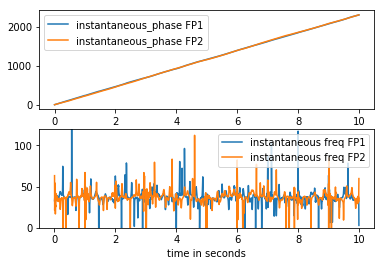

In [200]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp

duration = 10.0
fs = 256.0
samples = int(fs*duration)
t = np.arange(samples) / fs


alcoholic_df_fp1 = EEG_data[(EEG_data['subject'] == 'co2a0000364') & (EEG_data['channel'] == 'FP1')]
alcoholic_df_fp2 = EEG_data[(EEG_data['subject'] == 'co2a0000364') & (EEG_data['channel'] == 'FP2')]



signal1 = alcoholic_df_fp1.iloc[:,7]
signal2 = alcoholic_df_fp2.iloc[:,7]


analytic_signal1 = hilbert(signal1)
amplitude_envelope1 = np.abs(analytic_signal1)
instantaneous_phase1 = np.unwrap(np.angle(analytic_signal1))
instantaneous_frequency1 = (np.diff(instantaneous_phase1) /
                           (2.0*np.pi) * fs)

analytic_signal2 = hilbert(signal2)
amplitude_envelope2 = np.abs(analytic_signal2)
instantaneous_phase2 = np.unwrap(np.angle(analytic_signal2))
instantaneous_frequency2 = (np.diff(instantaneous_phase2) /
                           (2.0*np.pi) * fs)


fig = plt.figure()
ax0 = fig.add_subplot(211)
ax0.plot(t, instantaneous_phase1, label='instantaneous_phase FP1')
ax0.plot(t, instantaneous_phase2, label='instantaneous_phase FP2')

#ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1 = fig.add_subplot(212)
ax1.plot(t[1:], instantaneous_frequency1, label='instantaneous freq FP1')
ax1.plot(t[1:], instantaneous_frequency2, label='instantaneous freq FP2')

ax1.legend()

ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 120.0)


(0.0, 120.0)

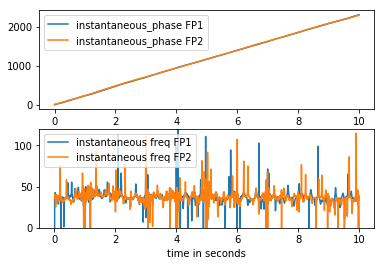

In [199]:
#control_df = EEG_data[(EEG_data['subject'] == 'co2c0000337') & (EEG_data['channel'] == 'FP1')]

duration = 10.0
fs = 256.0
samples = int(fs*duration)
t = np.arange(samples) / fs


control_df_fp1 = EEG_data[(EEG_data['subject'] == 'co2c0000337') & (EEG_data['channel'] == 'FP1')]
control_df_fp2 = EEG_data[(EEG_data['subject'] == 'co2c0000337') & (EEG_data['channel'] == 'FP2')]



signal1 = control_df_fp1.iloc[:,7]
signal2 = control_df_fp2.iloc[:,7]


analytic_signal1 = hilbert(signal1)
amplitude_envelope1 = np.abs(analytic_signal1)
instantaneous_phase1 = np.unwrap(np.angle(analytic_signal1))
instantaneous_frequency1 = (np.diff(instantaneous_phase1) /
                           (2.0*np.pi) * fs)

analytic_signal2 = hilbert(signal2)
amplitude_envelope2 = np.abs(analytic_signal2)
instantaneous_phase2 = np.unwrap(np.angle(analytic_signal2))
instantaneous_frequency2 = (np.diff(instantaneous_phase2) /
                           (2.0*np.pi) * fs)


fig = plt.figure()
ax0 = fig.add_subplot(211)
ax0.plot(t, instantaneous_phase1, label='instantaneous_phase FP1')
ax0.plot(t, instantaneous_phase2, label='instantaneous_phase FP2')

#ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1 = fig.add_subplot(212)
ax1.plot(t[1:], instantaneous_frequency1, label='instantaneous freq FP1')
ax1.plot(t[1:], instantaneous_frequency2, label='instantaneous freq FP2')

ax1.legend()
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 120.0)




(0.0, 120.0)

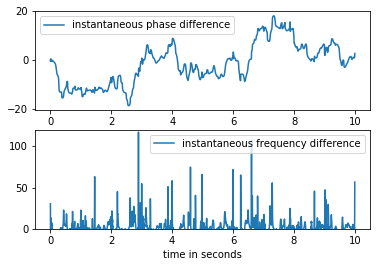

In [196]:
duration = 10.0
fs = 256.0
samples = int(fs*duration)
t = np.arange(samples) / fs


alcoholic_df_fp1 = EEG_data[(EEG_data['subject'] == 'co2a0000364') & (EEG_data['channel'] == 'FP1')]
alcoholic_df_fp2 = EEG_data[(EEG_data['subject'] == 'co2a0000364') & (EEG_data['channel'] == 'FP2')]



signal1 = alcoholic_df_fp1.iloc[:,7]
signal2 = alcoholic_df_fp2.iloc[:,7]


analytic_signal1 = hilbert(signal1)
amplitude_envelope1 = np.abs(analytic_signal1)
instantaneous_phase1 = np.unwrap(np.angle(analytic_signal1))
instantaneous_frequency1 = (np.diff(instantaneous_phase1) /
                           (2.0*np.pi) * fs)

analytic_signal2 = hilbert(signal2)
amplitude_envelope2 = np.abs(analytic_signal2)
instantaneous_phase2 = np.unwrap(np.angle(analytic_signal2))
instantaneous_frequency2 = (np.diff(instantaneous_phase2) /
                           (2.0*np.pi) * fs)


fig = plt.figure()
ax0 = fig.add_subplot(211)
#ax0.plot(t, instantaneous_phase1, label='instantaneous_phase FP1')
ax0.plot(t, instantaneous_phase2-instantaneous_phase1, label='instantaneous phase difference')

#ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1 = fig.add_subplot(212)
#ax1.plot(t[1:], instantaneous_frequency1)
ax1.plot(t[1:], instantaneous_frequency2-instantaneous_frequency1,label='instantaneous frequency difference')
ax1.legend()
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 120.0)


Text(0.5,0,'time in seconds')

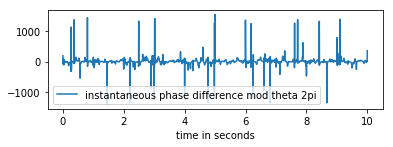

In [211]:
duration = 10.0
fs = 256.0
samples = int(fs*duration)
t = np.arange(samples) / fs


alcoholic_df_fp1 = EEG_data[(EEG_data['subject'] == 'co2a0000364') & (EEG_data['channel'] == 'FP1')]
alcoholic_df_fp2 = EEG_data[(EEG_data['subject'] == 'co2a0000364') & (EEG_data['channel'] == 'FP2')]



signal1 = alcoholic_df_fp1.iloc[:,7]
signal2 = alcoholic_df_fp2.iloc[:,7]


analytic_signal1 = hilbert(signal1)
amplitude_envelope1 = np.abs(analytic_signal1)
instantaneous_phase1 = np.unwrap(np.angle(analytic_signal1))
instantaneous_frequency1 = (np.diff(instantaneous_phase1) %
                           (2.0*np.pi) * fs)

analytic_signal2 = hilbert(signal2)
amplitude_envelope2 = np.abs(analytic_signal2)
instantaneous_phase2 = np.unwrap(np.angle(analytic_signal2))
instantaneous_frequency2 = (np.diff(instantaneous_phase2) %
                           (2.0*np.pi) * fs)


fig = plt.figure()
#ax0 = fig.add_subplot(211)
#ax0.plot(t, instantaneous_phase1, label='instantaneous_phase FP1')
#ax0.plot(t, instantaneous_phase2-instantaneous_phase1, label='instantaneous phase difference')

#ax0.plot(t, amplitude_envelope, label='envelope')
#ax0.set_xlabel("time in seconds")
#ax0.legend()
ax1 = fig.add_subplot(212)
#ax1.plot(t[1:], instantaneous_frequency1)
ax1.plot(t[1:], instantaneous_frequency2-instantaneous_frequency1,label='instantaneous phase difference mod theta 2pi')
ax1.legend()
ax1.set_xlabel("time in seconds")



In [204]:
from scipy import signal
import matplotlib.pyplot as plt

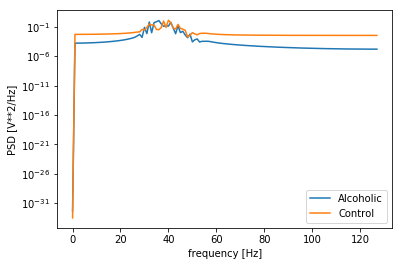

In [209]:
i=0
x = alcoholic_df.iloc[i*255:(i+1)*255,7]
y = control_df.iloc[i*255:(i+1)*255,7]

f1, Pxx_den = signal.periodogram(x, 255)
plt.semilogy(f1, Pxx_den,label='Alcoholic')
f2, Pxx_den = signal.periodogram(y, 255)
plt.semilogy(f2, Pxx_den,label='Control')
#plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.gca().legend(('Alcoholic','Control'))
plt.show()

In [221]:
alcoholic_df_fp1 = EEG_data[(EEG_data['subject'] == 'co2a0000364') & (EEG_data['channel'] == 'FP2')]
x = alcoholic_df_fp1.iloc[:,7]

# Writting on specified sheet 
df.to_csv(r'/home/biswadeep/Desktop/EEG-data-analysis-master/alcoholic_fp2.csv')
